## 데이터 분석 및 전처리

### 5/11 실습

In [ ]:
### 데이터 불러오기

# 구글 서버와 내 드라이브 연결하기 
from google.colab import drive
drive.mount('/content/drive')

# 현재 작업 디렉토리 변경하기
%cd '/content/drive/MyDrive/KDT/비정형텍스트분석'

# 필요한 라이브러리 임폴트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정
file_path = 'quora.csv'

# pd.read_csv() --> 데이터프레임 생성
df = pd.read_csv(file_path)

# 결과 확인하기
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/비정형텍스트분석


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
### 누락 데이터 확인
nulls_df = df.isnull().sum()

# 결과 확인하기
print(nulls_df)

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


In [ ]:
### 누락 데이터 제거
df.dropna(inplace=True)

# 결과 확인하기
print(df.isnull().sum())

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


In [ ]:
### 인덱스 재설정
df.reset_index(drop=True, inplace=True)

# 결과 확인하기
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404282,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404283,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404284,404287,537928,537929,What is one coin?,What's this coin?,0
404285,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
### 데이터 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
### 두 개의 질문 --> 1개의 질문으로 결합 --> ['가나'] + ['다라'] --> Series 자료형
list_sum = list(df.question1) + list(df.question2)
question_set = pd.Series(data=list_sum)

# 결과 확인하기
print(question_set)

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808569    How many keywords are there in PERL Programmin...
808570           Is it true that there is life after death?
808571                                    What's this coin?
808572    I am having little hairfall problem but I want...
808573        What is it like to have sex with your cousin?
Length: 808574, dtype: object


### 데이터 분석

In [ ]:
### 질문들의 중복 상태에 대한 확인 및 분석

# 중복을 제외한 데이터(고유한 데이터)의 수 --> np.unique(array) 
print(f'중복을 제외한 데이터의 총 질문 수 = {len(np.unique(question_set))}')

print('-'*80)

# 2번 이상 반복해서 나타나는 질문의 수
print(f'2번 이상 반복해서 나타나는 질문의 수 : {np.sum(question_set.value_counts() > 1)}')

중복을 제외한 데이터의 총 질문 수 = 537359
--------------------------------------------------------------------------------
2번 이상 반복해서 나타나는 질문의 수 : 111870


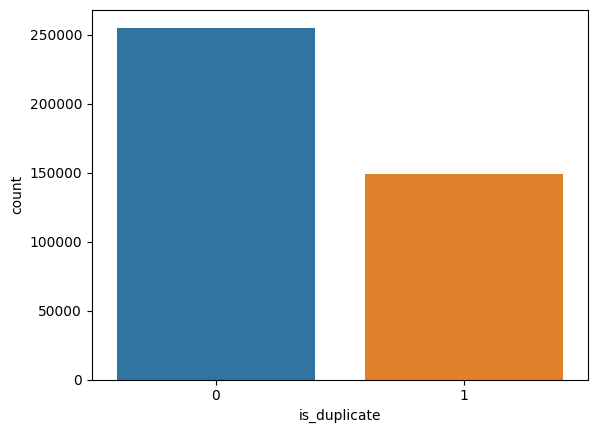

In [ ]:
### 'is_duplicate' 컬럼의 항목별 빈도수 시각화
sns.countplot(data=df, x='is_duplicate')
plt.show()

In [ ]:
### 'is_duplicate' 컬럼의 항목별 빈도수 / 비율 추출

# 항목별 빈도수 추출
counts = df['is_duplicate'].value_counts()
print(f'항목별 빈도수 : \n{counts}')

print('-'*80)

# 항목별 비율 추출
ratio = df['is_duplicate'].value_counts(normalize=True)
print(f'항목별 비율 : \n{ratio}')

항목별 빈도수 : 
0    255024
1    149263
Name: is_duplicate, dtype: int64
--------------------------------------------------------------------------------
항목별 비율 : 
0    0.630799
1    0.369201
Name: is_duplicate, dtype: float64


In [ ]:
### 질문 데이터의 길이 추출
question_length = question_set.apply(lambda x:len(x))  

# 결과 확인하기
print(question_length)

0          66
1          51
2          73
3          50
4          76
         ... 
808569     79
808570     42
808571     17
808572    127
808573     45
Length: 808574, dtype: int64


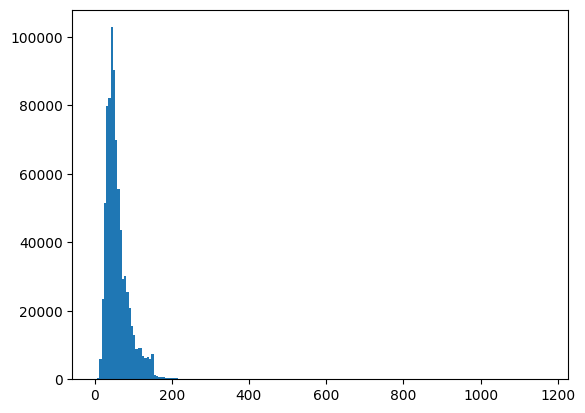

In [ ]:
### 질문 데이터의 길이 시각화
# question_length.plot(kind='hist')
# plt.show()

plt.hist(x=question_length.values, bins=200)
plt.show()

In [ ]:
### 질문 데이터 -->  문자 수에 대한 통계랑 추출
max = np.max(question_length.values)
min = np.min(question_length.values)
mean = np.mean(question_length.values)
median = np.median(question_length.values)
q1 = np.percentile(question_length, 25)
q3 = np.percentile(question_length, 75)

# 결과 확인하기
print(f'질문 길이의 최대값 = {max}')
print(f'질문 길이의 최소값 = {min}')
print(f'질문 길이의 평균값 = {mean}')
print(f'질문 길이의 중간값 = {median}')
print(f'질문 길이의 25% 값 = {q1}')
print(f'질문 길이의 75% 값 = {q3}')

질문 길이의 최대값 = 1169
질문 길이의 최소값 = 1
질문 길이의 평균값 = 59.82275215379174
질문 길이의 중간값 = 51.0
질문 길이의 25% 값 = 39.0
질문 길이의 75% 값 = 72.0


In [ ]:
### 질문 데이터 --> 단어 수 분포 추출
question_word_counts = question_set.apply(lambda x:len(x.split()))

# 결과 확인하기
print(question_word_counts)

0         14
1          8
2         14
3         11
4         13
          ..
808569    13
808570     9
808571     3
808572    25
808573    10
Length: 808574, dtype: int64


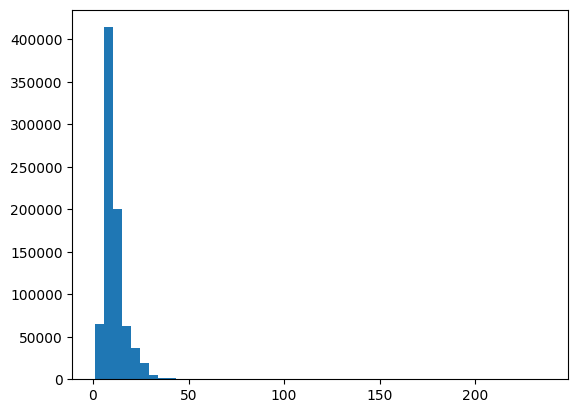

In [ ]:
### 질문 데이터 --> 단어 수 시각화
plt.hist(x=question_word_counts.values, bins=50)
plt.show()

In [ ]:
### 질문 데이터 -->  단어 수에 대한 통계랑 추출
max = np.max(question_word_counts.values)
min = np.min(question_word_counts.values)
mean = np.mean(question_word_counts.values)
median = np.median(question_word_counts.values)
q1 = np.percentile(question_word_counts, 25)
q3 = np.percentile(question_word_counts, 75)
p99 = np.percentile(question_word_counts, 99) 

# 결과 확인하기
print(f'단어 수의 최대값 = {max}')
print(f'단어 수의 최소값 = {min}')
print(f'단어 수의 평균값 = {mean}')
print(f'단어 수의 중간값 = {median}')
print(f'단어 수의 25% 값 = {q1}')
print(f'단어 수의 75% 값 = {q3}')
print(f'단어 수의 99% 값 = {p99}')

단어 수의 최대값 = 237
단어 수의 최소값 = 1
단어 수의 평균값 = 11.0621365515092
단어 수의 중간값 = 10.0
단어 수의 25% 값 = 7.0
단어 수의 75% 값 = 13.0
단어 수의 99% 값 = 31.0


In [ ]:
### 질문 데이터 --> 몇 가지 상태 확인 --> 전처리를 위한 예비 과정
qmark = np.mean(question_set.apply(lambda x: '?' in x).values)
fullstop = np.mean(question_set.apply(lambda x : '.' in x).values)
math = np.mean(question_set.apply(lambda x : '[math]' in x).values)
capital_first = np.mean(question_set.apply(lambda x : x[0].isupper()))

# 결과 확인하기
print(f'물음표가 있는 질문의 비율 : {round(qmark*100, 2)}%')
print(f'마침표가 있는 질문의 비율 : {round(fullstop*100, 2)}%')
print(f'수학 태그가 있는 질문의 비율 : {round(math*100, 2)}%')
print(f'첫 글자가 대문자인 질문의 비율 : {round(capital_first*100, 2)}%')

물음표가 있는 질문의 비율 : 99.87%
마침표가 있는 질문의 비율 : 6.31%
수학 태그가 있는 질문의 비율 : 0.12%
첫 글자가 대문자인 질문의 비율 : 99.81%


### 데이터 전처리

In [ ]:
### 필요한 라이브러리 임폴트
import re
import tensorflow as tf

In [ ]:
### 'is_dupulicate' 컬럼의 비율 --> 동일하게 조정 --> undersampling

# 긍정과 부정 데이터로 분할
pos_data = df.loc[df['is_duplicate']==1, :]
neg_data = df.loc[df['is_duplicate']==0, :]

# 비율 추출 : pos_data/neg_data
sample_frac = len(pos_data) / len(neg_data)

# undersampling
sampled_neg_data = neg_data.sample(frac=sample_frac, random_state=99)

# 결과 확인하기
print(f'중복 질문(긍정 데이터) 개수 = {len(pos_data)}')
print('-'*80)
print(f'중복이 아닌(부정 데이터) 개수 = {len(sampled_neg_data)}')

중복 질문(긍정 데이터) 개수 = 149263
--------------------------------------------------------------------------------
중복이 아닌(부정 데이터) 개수 = 149263


In [ ]:
### 'is_dupulicate' 컬럼의 비율을 동일하게 조정한 데이터 --> 결합
df_data = pd.concat([sampled_neg_data, pos_data])

# 결과 확인하기
df_data

,id,qid1,qid2,question1,question2,is_duplicate
300801,300803,423638,423639,Are we all unique? Why?,What unique quality do you offer the world?,0
273068,273070,391458,391459,What is your review of EFT?,What are tail-enders in EFT?,0
211097,211099,25006,315857,What is the salary of a Consultant in KPMG adv...,What is Consultants salary in KPMG India?,0
361851,361853,491730,491731,Why should I achieve something great?,What do you do when you achieve something great?,0
91488,91488,153303,153304,Stock Market: Who rigs the stock market?,Is the stock market rigged?,0
...,...,...,...,...,...,...
404277,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404278,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404279,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404281,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


In [ ]:
### 정규 표현식 모듈 --> 문장 기호 제거 + 소문자로 변환

# pattern
pattern = "[~.,!?\"':;)(]"

# 각 컬럼 --> 질문 문장이 들어있는 리스트 생성
question1 = [s for s in df_data['question1']]
question2 = [s for s in df_data['question2']]

# 전처리 후 결과를 저장할 리스트 생성
filtered_question1 = []
filtered_question2 = []

# for문 --> 문장 기호 제거 + 소문자로 변환
for q in question1:
    filtered_question1.append(re.sub(pattern, "", q).lower()) 

for q in question2:
    filtered_question2.append(re.sub(pattern, "", q).lower())

In [ ]:
### 정규 표현식 모듈 --> 문장 기호 제거 + 소문자로 변환 --> 다른 방법으로 "test"

# pattern
pattern = "[~.,!?\"':;)(]"

# 문장 기호 제거 + 소문자로 변환 --> 배열 생성
filtered_question1 = list(df_data['question1'].apply(lambda x : re.sub(pattern, "", x).lower()).values)
filtered_question2 = list(df_data['question2'].apply(lambda x : re.sub(pattern, "", x).lower()).values)

# 결과 확인하기
print(filtered_question1[:3])
print(filtered_question2[:3])

['are we all unique why', 'what is your review of eft', 'what is the salary of a consultant in kpmg advisory in india']
['what unique quality do you offer the world', 'what are tail-enders in eft', 'what is consultants salary in kpmg india']


In [ ]:
### 토큰화 + 단어 사전 생성

# Tokenizer 객체 생성
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# fit_on_texts() 사용
tokenizer.fit_on_texts(filtered_question1+filtered_question2)

In [ ]:
### 단어 사전 확인
vocab = tokenizer.word_index

# 결과 확인하기
print(f'단어의 수 = {len(vocab)}')
print('-'*80)
print(f'단어 사전 확인 : \n{vocab}')

단어의 수 = 76677
--------------------------------------------------------------------------------
단어 사전 확인 : 
{'the': 1, 'what': 2, 'is': 3, 'how': 4, 'i': 5, 'to': 6, 'a': 7, 'in': 8, 'do': 9, 'of': 10, 'are': 11, 'and': 12, 'can': 13, 'for': 14, 'you': 15, 'why': 16, 'best': 17, 'my': 18, 'it': 19, 'on': 20, 'does': 21, 'which': 22, 'be': 23, 'if': 24, 'some': 25, 'or': 26, 'get': 27, 'that': 28, 'have': 29, 'should': 30, 'with': 31, 'your': 32, 'an': 33, 'from': 34, 'india': 35, 'will': 36, 'people': 37, 'who': 38, 'when': 39, 'like': 40, 'good': 41, 'would': 42, 'at': 43, 'there': 44, 'as': 45, 'about': 46, 'quora': 47, 'between': 48, 'most': 49, 'one': 50, 'not': 51, 'way': 52, 'we': 53, 'make': 54, 'did': 55, 'life': 56, 'by': 57, 'where': 58, 'was': 59, 'money': 60, 'any': 61, 'so': 62, 'time': 63, 'me': 64, 'after': 65, 'learn': 66, 'they': 67, 'this': 68, 'know': 69, 'difference': 70, 'whats': 71, 'has': 72, 'new': 73, 'think': 74, 'use': 75, 'trump': 76, 'ever': 77, 'much': 78, 

In [ ]:
### sequences_to_texts() --> 정수 인코딩 실행
question1_sequence = tokenizer.texts_to_sequences(filtered_question1)
question2_sequence = tokenizer.texts_to_sequences(filtered_question2)

# 결과 확인하기
print(question1_sequence[0])
print('-'*80)
print(question2_sequence[0])

[11, 53, 80, 1721, 16]
--------------------------------------------------------------------------------
[2, 1721, 597, 9, 15, 866, 1, 92]


In [ ]:
# 문장 --> 단어의 길이를 일정하게 처리

# 기준 길이 설정  
max_len = 31

# tf.keras.utils.pad_sequences() 사용
q1_data = tf.keras.utils.pad_sequences(sequences=question1_sequence, maxlen=max_len, padding='post')
q2_data = tf.keras.utils.pad_sequences(sequences=question2_sequence, maxlen=max_len, padding='post')

# 결과 확인하기
print(q1_data[0])
print('-'*80)
print(q2_data[0])

[  11   53   80 1721   16    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
--------------------------------------------------------------------------------
[   2 1721  597    9   15  866    1   92    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [ ]:
### 정답 label --> numpy 배열
labels = df_data['is_duplicate'].values

# 결과 확인하기
print(f'정답 labels의 모양 : {labels.shape}')

정답 labels의 모양 : (298526,)


In [ ]:
### 결과 저장하기
np.save('q1_data.npy', q1_data)
np.save('q2_data.npy', q2_data)
np.save('labels.npy', labels)

In [ ]:
### 저장된 결과 불러오기
q1_data = np.load('q1_data.npy')
q2_data = np.load('q2_data.npy')
labels = np.load('labels.npy')

# 결과 확인하기
print(q1_data[0])
print('-'*80)
print(q2_data[0])
print('-'*80)
print(labels[0])

[  11   53   80 1721   16    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
--------------------------------------------------------------------------------
[   2 1721  597    9   15  866    1   92    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
--------------------------------------------------------------------------------
0
